# Import

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import uniform, normal, poisson, binomial
from scipy import stats
import warnings
import seaborn
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# GLM Overview

# GLM - Logisitc Regression
- Linking function: logit: logit(y) = log(y/1-y)
- Sigmoid function: g(z) = 1/1+e^-z
- Probability distribution: binomial/bernoulli

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

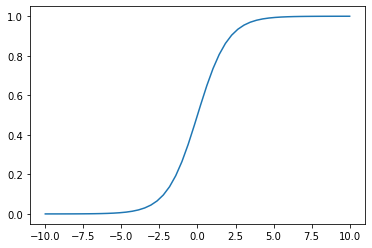

In [4]:
# View the sigmoid function
plt.plot(np.linspace(-10,10),sigmoid(np.linspace(-10,10)))

In [20]:
a = 3 # slope
b = -10 # intercept
n = 100 # sample size
x = np.sort(uniform(1,5,size=n))

In [21]:
g = sigmoid(a*x + b)

In [22]:
y = binomial(n=1, p=g)

In [23]:
exog, endog = sm.add_constant(x), y

In [24]:
# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
res = mod.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18.172
Date:                Tue, 26 Apr 2022   Deviance:                       36.343
Time:                        12:41:21   Pearson chi2:                     55.0
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.4042      3.088     -4.017      0.000     -18.457      -6.351
x1             3.9236      0.947      4.141      0.000       2.067       5.781
==============================================================================
"""

Text(0, 0.5, 'Y')

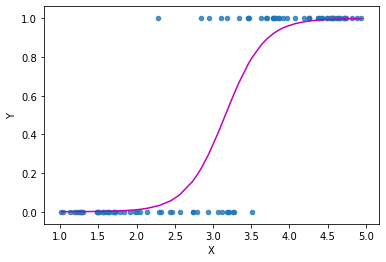

In [25]:
y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(x, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

# GLM - Poisson Regression

In [52]:
def glm_poisson(a:int, b:int, n:int) -> np.ndarray:
    """
    Linking function: log (log(g) = z)
    Probability distribution: Poisson(g)
    
    param: a, slope coefficient for linear predictor.
    param: b, intercept coefficient for linear predictor.
    param: n, sample size
    
    return: ypred: np.ndarray, predicted values from fitted GLM model
    """
    # ============== #
    # Initialize GLM #
    # ============== #
    x = uniform(1,5,size=n)
    g = np.exp(a*x + b)
    y = poisson(g)
    exog, endog = sm.add_constant(x), y
    # ============== #
    #    Modelling   #
    # ============== #
    model = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
    result = model.fit()
    print(result.summary())
    y_pred = result.predict(exog)
    # ============== #
    #    Plotting    #
    # ============== #
    idx = x.argsort()
    x_ord, y_pred_ord = x[idx], y_pred[idx]
    plt.plot(x_ord, y_pred_ord, color='m') # GLM prediction
    plt.scatter(x, y,  s=20, alpha=0.8) # data values
    plt.title('Poisson Regression GLM', fontsize=12)
    return y_pred

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -214.82
Date:                Tue, 26 Apr 2022   Deviance:                       120.26
Time:                        12:51:09   Pearson chi2:                     112.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1088      0.163     -0.666      0.5

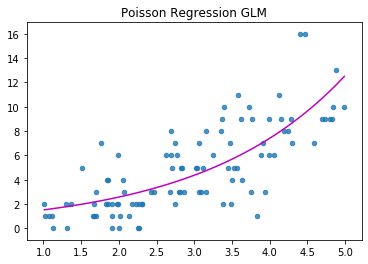

In [53]:
y_pred = glm_poisson(0.6,-0.4,100)

# Custom GLM
- Linking function: logit
- Probability distribution: Normal

In [54]:
# ============== #
# Initialize GLM #
# ============== #
x = uniform(1,5,size=100)
g = sigmoid(a*x + b)
y = normal(g)
exog, endog = sm.add_constant(x), y

In [58]:
# ============== #
#    Modelling   #
# ============== #
model = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
result = model.fit()
print(result.summary())
y_pred = result.predict(exog)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 26 Apr 2022   Deviance:                          inf
Time:                        12:54:18   Pearson chi2:                 5.20e+17
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4704.8828     42.874   -109.738      0.0

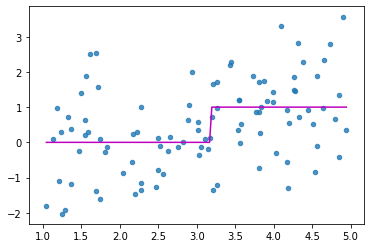

In [59]:
# ============== #
#    Plotting    #
# ============== #
idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='m') # GLM prediction
plt.scatter(x, y,  s=20, alpha=0.8) # data values